In [391]:
import pandas as pd
import numpy as np

In [392]:
data=pd.read_csv('absenteeism_perprocessed.csv')
data.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create Targets
Logistic regression is a type of classification. So we will be basically classifying people into classes. What are these classes?.We will use here is to create two classes, 1 representing people who have been excessively absent, and another, which represents people that haven't. For this exercise, we will use a methodology, which is a tiny bit naive, but quite numerically stable. We will take. the will take the median value of the absenteeism time and our cell. Everything below the median would be considered normal. Everything above the median would be excessive.

In [394]:
data['Absenteeism Time in Hours'].median()

3.0

In [395]:
targets=np.where(data["Absenteeism Time in Hours"]>data['Absenteeism Time in Hours'].median(),1,0)
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [396]:
data["Excessive Absenteeism"]=targets
data.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0


In [397]:
targets.sum()/targets.shape[0]

0.45571428571428574

46% 1's and 54% 0's so balanced

In [399]:
data_targets=data.drop(["Absenteeism Time in Hours","Day of the Week","Distance to Work","Daily Work Load Average"],axis=1)
data_targets.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month_value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0


In [400]:
data_targets is data

False

### Selecting the inputs

In [402]:
data_targets.shape

(700, 12)

In [403]:
#selecting all rows and columns except excessive absenteeism
data_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month_value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [404]:
unscaled_inputs=data_targets.iloc[:,:-1]

### Standardize the data

In [406]:
from sklearn.preprocessing import StandardScaler
absent_scaler=StandardScaler()

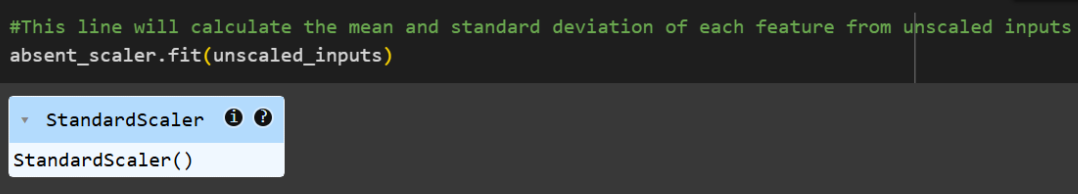
this we do but we have a problem
But we had standardized the dummy variables in this, which. changes the whole meaning of why we are using the dummy variables.We have to not change the dummy variables that is reason_1 reason_2 reason. as we have changed all of them. Now we have to retrieve it back.
so we use custom scaling

In [408]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator,TransformerMixin):
  def __init__(self,columns):
    self.scaler=StandardScaler()
    self.columns=columns
    self.mean_=None
    self.var_=None

  def fit(self,X,y=None):
    self.scaler.fit(X[self.columns])
    self.mean_=np.mean(X[self.columns])
    self.var_=np.var(X[self.columns])
    return self

  def transform(self,X,y=None,copy=None):
    init_col_order=X.columns
    X_scaled=pd.DataFrame(self.scaler.transform(X[self.columns]),columns=self.columns)
    X_not_scaled=X.loc[:,~X.columns.isin(self.columns)]
    return pd.concat([X_not_scaled,X_scaled],axis=1)[init_col_order]

In [409]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month_value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [410]:
#columns_to_scale=['Month_value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       #'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education','Children', 'Pets']
columns_to_omit=['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [411]:
columns_to_scale=[x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [412]:
absent_scaler=CustomScaler(columns_to_scale)

In [413]:
absent_scaler.fit(unscaled_inputs)

C:\Users\kusha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


CustomScaler(columns=['Month_value', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pets'])

We have the information with the inputs are still unscaled. We have just prepared the scaling mechanism in order to apply it,we must use another method called transform.

In [415]:
scaled_inputs=absent_scaler.transform(unscaled_inputs)
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month_value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.388293,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.388293,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.388293,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.388293,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


whenever we get new data we transform

```
new_raw_data=pd.read_csv("new_data.csv")
new_scaled_data=absent_scaler.transform(new_raw_data)
```




In [417]:
scaled_inputs.shape

(700, 11)

### Train test split

In [419]:
from sklearn.model_selection import train_test_split

In [420]:
train_test_split(scaled_inputs,targets)

[     Reason_1  Reason_2  Reason_3  Reason_4  Month_value  \
 51          0         0         0         0     0.753746   
 513         0         0         0         1     1.039256   
 171         0         0         0         1    -0.959313   
 517         0         0         0         1     1.039256   
 275         0         0         0         1     0.753746   
 ..        ...       ...       ...       ...          ...   
 579         0         0         1         0    -1.530333   
 254         0         0         0         1     0.468236   
 656         0         0         1         0    -0.673803   
 30          0         0         1         0     0.468236   
 335         0         1         0         0     1.324766   
 
      Transportation Expense       Age  Body Mass Index  Education  Children  \
 51                 0.040034 -1.320435        -0.643782          0 -0.019280   
 513                1.005844  1.973929         2.178644          0 -0.919030   
 171                0.0400

In [421]:
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,train_size=0.9,random_state=20)

In [422]:
print(x_train.shape,x_test.shape)

(630, 11) (70, 11)


In [423]:
print(y_train.shape,y_test.shape)

(630,) (70,)


##Logistic Regression


In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [426]:
reg=LogisticRegression()

In [427]:
reg.fit(x_train,y_train)

LogisticRegression()

In [428]:
reg.score(x_train,y_train)

0.7746031746031746

### Manual check of accuracy

In [430]:
model_outputs_train=reg.predict(x_train)
model_outputs_train

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [431]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [432]:
model_outputs_train==y_train

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [433]:
np.sum(model_outputs_train==y_train)/model_outputs_train.shape[0]

0.7746031746031746

To use this logistic regression model outside of the python, we must get our hands on the coefficients and the intercept.

## Finding Intercepts and coefficients


In [436]:
reg.intercept_

array([-1.73292111])

In [437]:
reg.coef_

array([[ 2.82471854,  0.97443912,  3.17196219,  0.88495493,  0.13513268,
         0.60753258, -0.24286724,  0.2881857 , -0.16188624,  0.37034273,
        -0.32579991]])

all of them are in ndarray

In [439]:
# since scaled_inputs are in ndarray
#scaled_inputs.columns.values

In [440]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month_value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [441]:
sum_table=pd.DataFrame(columns=["Feature Names"],data=unscaled_inputs.columns.values)
sum_table["coefficient"]=np.transpose(reg.coef_)
sum_table

,Feature Names,coefficient
0,Reason_1,2.824719
1,Reason_2,0.974439
2,Reason_3,3.171962
3,Reason_4,0.884955
4,Month_value,0.135133
5,Transportation Expense,0.607533
6,Age,-0.242867
7,Body Mass Index,0.288186
8,Education,-0.161886
9,Children,0.370343


In [442]:
sum_table.index+=1
sum_table.loc[0]=["intercept",reg.intercept_[0]]
sum_table=sum_table.sort_index()
sum_table

,Feature Names,coefficient
0,intercept,-1.732921
1,Reason_1,2.824719
2,Reason_2,0.974439
3,Reason_3,3.171962
4,Reason_4,0.884955
5,Month_value,0.135133
6,Transportation Expense,0.607533
7,Age,-0.242867
8,Body Mass Index,0.288186
9,Education,-0.161886


* Coefficients are also called weights, and the intercept is called bias.

* There are coefficient values and standardized coefficient values.

* Standardized coefficient values are from regression where all variables have been standardized.

* Standardized coefficients allow for easy comparison between variables.

* Standardized features have a variance of one or the same scale.

* When the scale is standard, the feature with the bigger weight is more important.

* Log odds are a result of the logistic regression model.

* Logistic regression is a linear function predicting log odds.

* Log odds are transformed into zeros and ones.

* To make coefficients more interpretable, find the exponentials of these coefficients.

* Create a new series in the data frame called "odds ratio."

* Odds ratio is the term for the exponentials of the coefficients.








In [444]:
sum_table["odds_ratio"]=np.exp(sum_table.coefficient)
sum_table.sort_values("odds_ratio",ascending=False)

,Feature Names,coefficient,odds_ratio
3,Reason_3,3.171962,23.854245
1,Reason_1,2.824719,16.856200
2,Reason_2,0.974439,2.649681
4,Reason_4,0.884955,2.422875
6,Transportation Expense,0.607533,1.835896
10,Children,0.370343,1.448231
8,Body Mass Index,0.288186,1.334005
5,Month_value,0.135133,1.144689
9,Education,-0.161886,0.850538
7,Age,-0.242867,0.784376


    
    A feature is not particularly important
      if it's coefficient is around zero
      if it's odds ratio is around 1.


## Testing

In [447]:
reg.score(x_test,y_test)

0.7428571428571429

In [448]:
predict_probabilty=reg.predict_proba(x_test)
predict_probabilty

array([[0.7282886 , 0.2717114 ],
       [0.61433155, 0.38566845],
       [0.46390039, 0.53609961],
       [0.78492657, 0.21507343],
       [0.08249603, 0.91750397],
       [0.34408264, 0.65591736],
       [0.31384333, 0.68615667],
       [0.14488408, 0.85511592],
       [0.78065507, 0.21934493],
       [0.75773174, 0.24226826],
       [0.51744489, 0.48255511],
       [0.20659517, 0.79340483],
       [0.06658285, 0.93341715],
       [0.72847971, 0.27152029],
       [0.36967613, 0.63032387],
       [0.51480062, 0.48519938],
       [0.56530396, 0.43469604],
       [0.55580029, 0.44419971],
       [0.47272726, 0.52727274],
       [0.05428556, 0.94571444],
       [0.7075823 , 0.2924177 ],
       [0.78492657, 0.21507343],
       [0.44292396, 0.55707604],
       [0.44292396, 0.55707604],
       [0.24355915, 0.75644085],
       [0.7458461 , 0.2541539 ],
       [0.51739563, 0.48260437],
       [0.84987133, 0.15012867],
       [0.2139883 , 0.7860117 ],
       [0.78492657, 0.21507343],
       [0.

The first column shows the probability our model assigned to the observation being 0. And 2nd the probability the model assigned to the observation being 1. That's why summing any two numbers horizontally will give you an output of 1

In [450]:
predict_probabilty.shape

(70, 2)

In [451]:
# we want 1 i.e probality of excessive absenteeism
predict_probabilty[:,1]

array([0.2717114 , 0.38566845, 0.53609961, 0.21507343, 0.91750397,
       0.65591736, 0.68615667, 0.85511592, 0.21934493, 0.24226826,
       0.48255511, 0.79340483, 0.93341715, 0.27152029, 0.63032387,
       0.48519938, 0.43469604, 0.44419971, 0.52727274, 0.94571444,
       0.2924177 , 0.21507343, 0.55707604, 0.55707604, 0.75644085,
       0.2541539 , 0.48260437, 0.15012867, 0.7860117 , 0.21507343,
       0.34980793, 0.67862045, 0.67311689, 0.50183887, 0.21507343,
       0.54608332, 0.22602286, 0.75163217, 0.37479411, 0.61518092,
       0.20863179, 0.4744018 , 0.23980612, 0.39751938, 0.78318881,
       0.56657569, 0.69788699, 0.2717114 , 0.20802046, 0.20233336,
       0.57979126, 0.3375788 , 0.65591736, 0.24872783, 0.81369598,
       0.40410415, 0.87928843, 0.24212042, 0.30630135, 0.31455992,
       0.71007594, 0.64715825, 0.29504268, 0.79020692, 0.20579515,
       0.2567136 , 0.0848399 , 0.22602286, 0.72113693, 0.30309644])

## Save the Model
We use pickle to save (It is a python module)
This means we will save the reg variable into a file. This file will then be loaded into new notebook, and thus we'll be able to use the machine learning algorithm

In [453]:
import pickle

In [454]:
with open('model','wb') as file:
  pickle.dump(reg,file)

In [455]:
with open('scaler','wb') as file:
  pickle.dump(absent_scaler,file)

In [456]:
data.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month_value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours',
       'Excessive Absenteeism'], dtype=object)